# Machine Learning Exam

```
Scoring:
============
 0-11: fail (1),
12-14: pass (2),
15-17: satisfactory (3),
18-20: good (4),
21-24: excellent (5).
```

The file [happiness.txt](happiness.txt) contains data on the happiness scores of various countries, according to the United Nation's World Happiness Report. The task involves analyzing this data using both unsupervised and supervised learning techniques.

Subtasks:

**(a)** Prepare a t-SNE visualization of the dataset, where each point represents a row, and the points are colored based on the happiness_score column.<br>

**(b)** Build a decision tree model with a `max_depth` of 3 to predict happiness_score from the other features. Measure the RMSE of the model using a 70%-30% train-test split. Plot the decision tree learned from the data.

**(c)** Build a gradient boosting model to predict happiness_score from the other features. Measure the RMSE of the model using the same 70%-30% train-test split as in the previous subtask. Optimize the `max_depth` parameter of the model and print the importance value of each feature in the best model.

**(d)** Using the optimal model from the previous subtask, re-train the model for each country, leaving that country out from the training set. Identify the country for which the positive gap between the true and predicted happiness scores is the largest, averaged over the data points for that country.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

data = pd.read_csv('happiness.txt', sep=',')

data

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption,generosity,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
777,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       782 non-null    object 
 1   happiness_score               782 non-null    float64
 2   gdp_per_capita                782 non-null    float64
 3   social_support                782 non-null    float64
 4   healthy_life_expectancy       782 non-null    float64
 5   freedom_to_make_life_choices  782 non-null    float64
 6   perceptions_of_corruption     781 non-null    float64
 7   generosity                    782 non-null    float64
 8   year                          782 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 55.1+ KB


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,782.0,5.379018,1.127456,2.693,4.509750,5.322000,6.189500,7.769000
gdp_per_capita,782.0,0.916047,0.407340,0.000,0.606500,0.982205,1.236187,2.096000
social_support,782.0,1.078392,0.329548,0.000,0.869363,1.124735,1.327250,1.644000
healthy_life_expectancy,782.0,0.612416,0.248309,0.000,0.440183,0.647310,0.808000,1.141000
freedom_to_make_life_choices,782.0,0.411091,0.152880,0.000,0.309768,0.431000,0.531000,0.724000
perceptions_of_corruption,781.0,0.125436,0.105816,0.000,0.054000,0.091000,0.156030,0.551910
generosity,782.0,0.218576,0.122321,0.000,0.130000,0.201982,0.278832,0.838075
year,782.0,2016.993606,1.417364,2015.000,2016.000000,2017.000000,2018.000000,2019.000000


In [4]:
data['perceptions_of_corruption'].unique()

array([0.41978   , 0.14145   , 0.48357   , 0.36503   , 0.32957   ,
       0.41372   , 0.31814   , 0.43844   , 0.42922   , 0.35637   ,
       0.07785   , 0.10583   , 0.18676   , 0.21312   , 0.1589    ,
       0.17521   , 0.37798   , 0.28703   , 0.2254    , 0.38583   ,
       0.32067   , 0.32524   , 0.11069   , 0.4921    , 0.0927    ,
       0.21843   , 0.12869   , 0.52208   , 0.20646   , 0.08484   ,
       0.02652   , 0.24558   , 0.0512    , 0.03187   , 0.06398   ,
       0.13586   , 0.08129   , 0.25609   , 0.13633   , 0.0114    ,
       0.11776   , 0.09472   , 0.30826   , 0.03431   , 0.1806    ,
       0.07857   , 0.1809    , 0.306     , 0.02901   , 0.088     ,
       0.01615   , 0.08242   , 0.08454   , 0.03787   , 0.01031   ,
       0.19317   , 0.05989   , 0.1909    , 0.04212   , 0.10501   ,
       0.0243    , 0.11023   , 0.03005   , 0.02299   , 0.1428    ,
       0.06146   , 0.17383   , 0.04741   , 0.30844   , 0.07521   ,
       0.37124   , 0.15184   , 0.        , 0.10441   , 0.15746

In [5]:
data['perceptions_of_corruption'].fillna(data['perceptions_of_corruption'].mean(),inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       782 non-null    object 
 1   happiness_score               782 non-null    float64
 2   gdp_per_capita                782 non-null    float64
 3   social_support                782 non-null    float64
 4   healthy_life_expectancy       782 non-null    float64
 5   freedom_to_make_life_choices  782 non-null    float64
 6   perceptions_of_corruption     782 non-null    float64
 7   generosity                    782 non-null    float64
 8   year                          782 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 55.1+ KB


In [7]:
data.columns

Index(['country', 'happiness_score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'generosity', 'year'],
      dtype='object')

In [11]:
feat = ['gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'generosity', 'year']
X = data[feat].values
X

array([[1.39651e+00, 1.34951e+00, 9.41430e-01, ..., 4.19780e-01,
        2.96780e-01, 2.01500e+03],
       [1.30232e+00, 1.40223e+00, 9.47840e-01, ..., 1.41450e-01,
        4.36300e-01, 2.01500e+03],
       [1.32548e+00, 1.36058e+00, 8.74640e-01, ..., 4.83570e-01,
        3.41390e-01, 2.01500e+03],
       ...,
       [3.50000e-01, 5.17000e-01, 3.61000e-01, ..., 2.50000e-02,
        1.58000e-01, 2.01900e+03],
       [2.60000e-02, 0.00000e+00, 1.05000e-01, ..., 3.50000e-02,
        2.35000e-01, 2.01900e+03],
       [3.06000e-01, 5.75000e-01, 2.95000e-01, ..., 9.10000e-02,
        2.02000e-01, 2.01900e+03]])

In [9]:
y = data['happiness_score'].values
y

array([7.587     , 7.561     , 7.527     , 7.522     , 7.427     ,
       7.406     , 7.378     , 7.364     , 7.286     , 7.284     ,
       7.278     , 7.226     , 7.2       , 7.187     , 7.119     ,
       6.983     , 6.946     , 6.94      , 6.937     , 6.901     ,
       6.867     , 6.853     , 6.81      , 6.798     , 6.786     ,
       6.75      , 6.67      , 6.611     , 6.575     , 6.574     ,
       6.505     , 6.485     , 6.477     , 6.455     , 6.411     ,
       6.329     , 6.302     , 6.298     , 6.295     , 6.269     ,
       6.168     , 6.13      , 6.123     , 6.003     , 5.995     ,
       5.987     , 5.984     , 5.975     , 5.96      , 5.948     ,
       5.89      , 5.889     , 5.878     , 5.855     , 5.848     ,
       5.833     , 5.828     , 5.824     , 5.813     , 5.791     ,
       5.77      , 5.759     , 5.754     , 5.716     , 5.709     ,
       5.695     , 5.689     , 5.605     , 5.589     , 5.548     ,
       5.477     , 5.474     , 5.429     , 5.399     , 5.36   

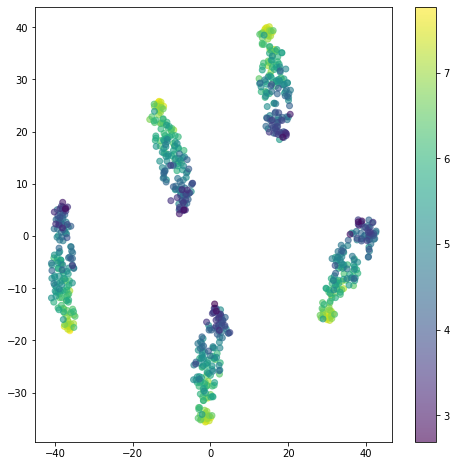

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visualize2(Z, y):
    plt.figure(figsize=(8, 8))
    plt.scatter(Z[:, 0], Z[:, 1], c=y, alpha=0.6)
    plt.colorbar()

tsne = TSNE(2)
Z = tsne.fit_transform(X)

visualize2(Z, y)

In [43]:
Z

array([[ 29.802162 , -15.46946  ],
       [ 31.57708  , -14.874807 ],
       [ 29.989033 , -16.016548 ],
       ...,
       [-37.218742 ,   5.373333 ],
       [-37.989403 ,   6.4620533],
       [-37.285378 ,   5.189662 ]], dtype=float32)

0.6676366984050096


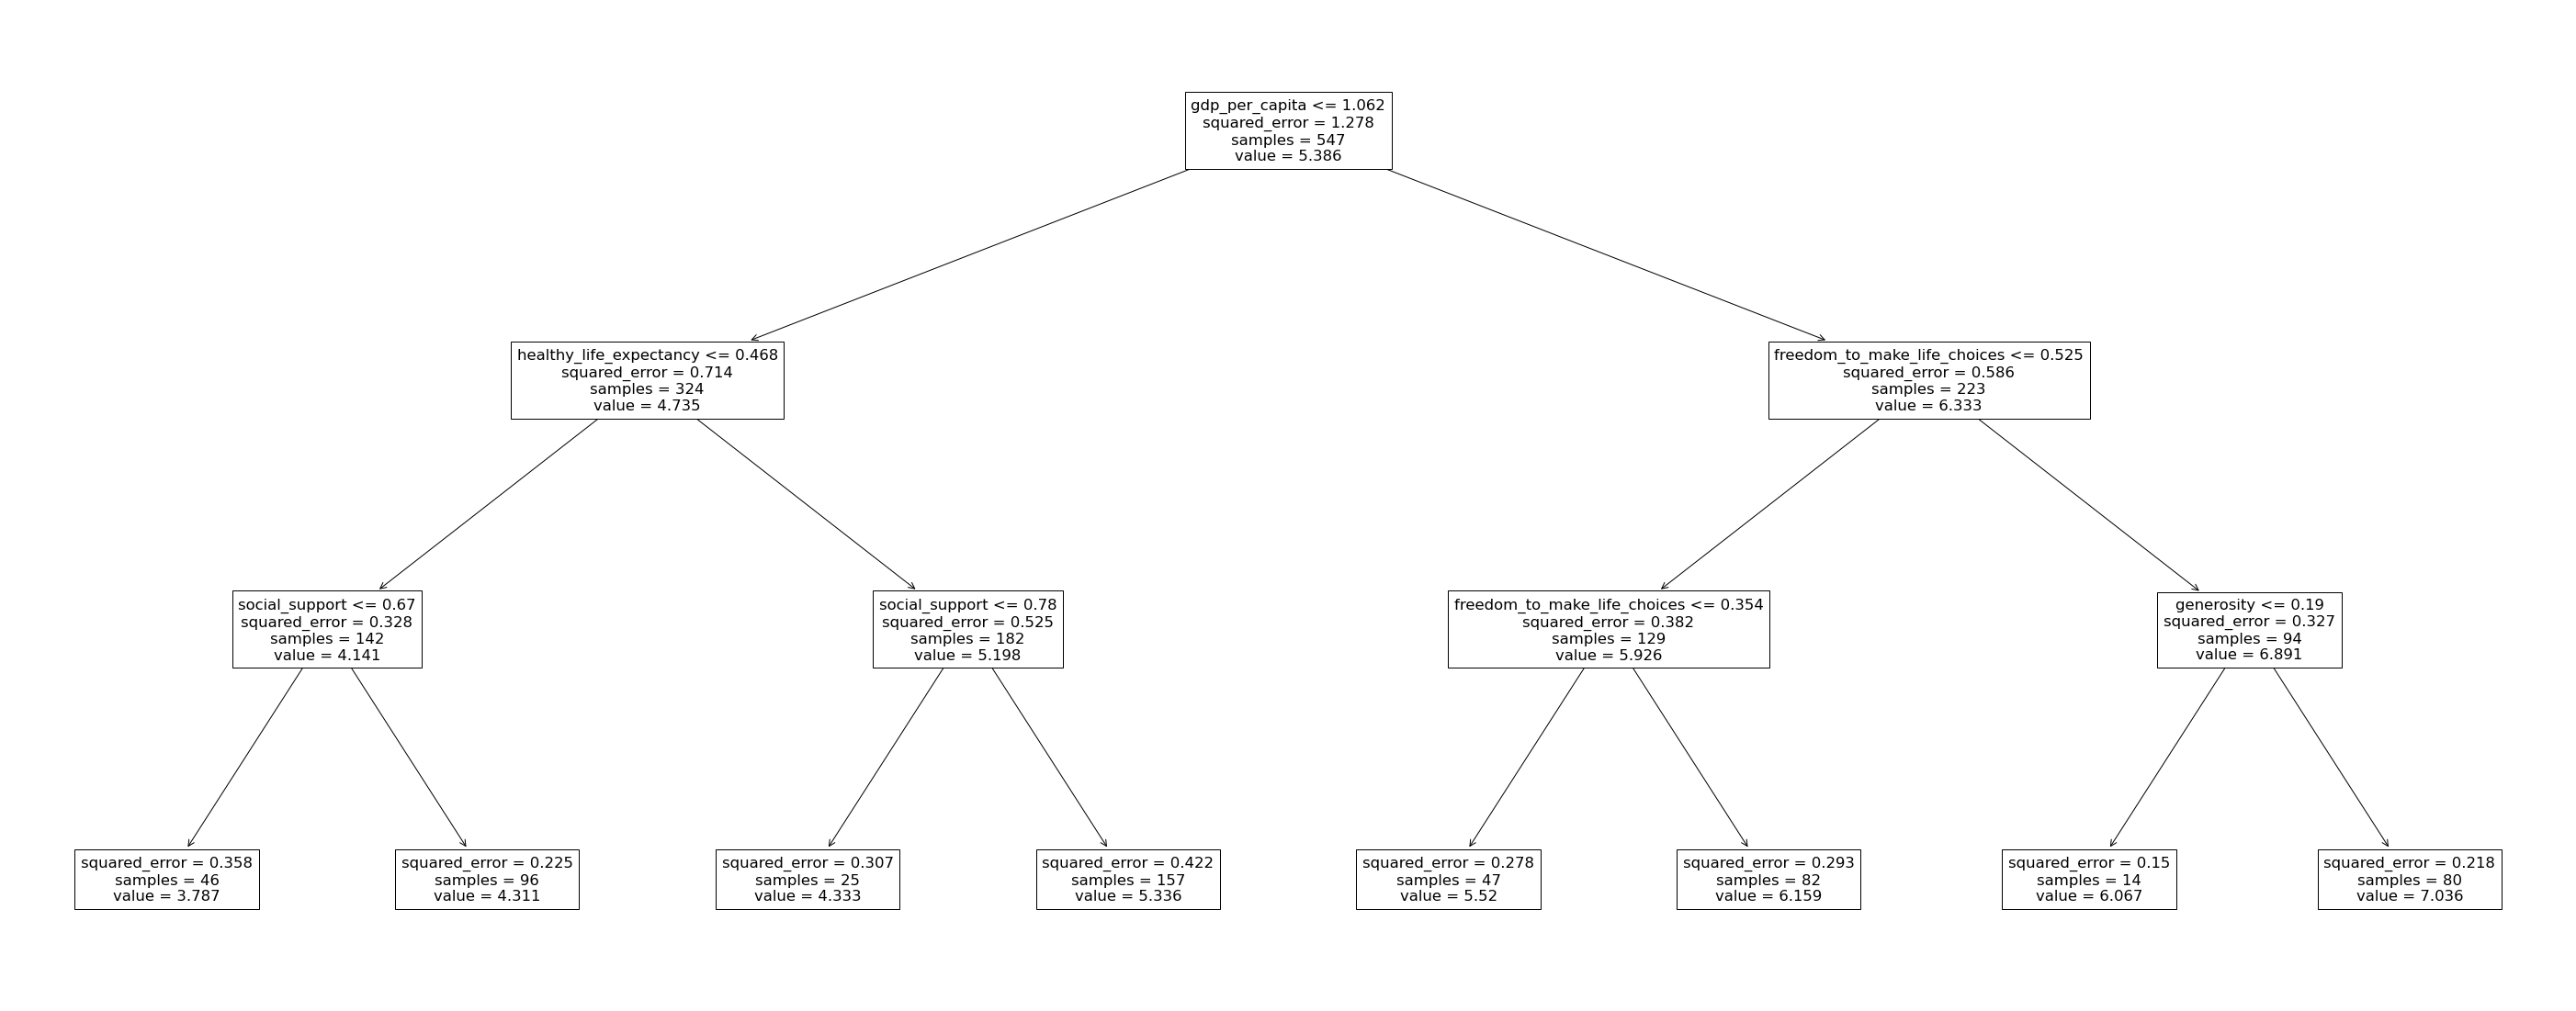

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print(rmse)

plt.figure(figsize=(50, 20))
plot_tree(model, feature_names=feat)
plt.show()


In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [1, 2, 3, 4, 5]}
gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(best_model)
pred_gb = best_model.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, pred_gb))
print(rmse_gb)
feature_importances = best_model.feature_importances_
for name, importance in zip(feat, feature_importances):
    print(f'{name}: {importance}')


GradientBoostingRegressor(max_depth=5, random_state=42)
0.5330905366770176
gdp_per_capita: 0.4969001551149709
social_support: 0.07179429475043674
healthy_life_expectancy: 0.21171402874285514
freedom_to_make_life_choices: 0.12753623783004966
perceptions_of_corruption: 0.045549324257076675
generosity: 0.03935834283597219
year: 0.007147616468638821


In [ ]:
countries = {}
for country in data['country'].unique():
    XX_train = data[data['country'] != country]
    XX_test = data[data['country'] == country]
    yy_train = XX_train['happiness_score']
    yy_test = XX_test['happiness_score']
    XX_test = XX_test.drop(columns=['happiness_score', 'country', 'year'])
    XX_train = XX_train.drop(columns=['happiness_score', 'country', 'year'])
    
    best_model.fit(XX_train, yy_train)

    pred = best_model.predict(XX_test)

    mk_pos = np.mean(yy_test - pred)

    countries[country] = mk_pos

best_country = max(countries, key=countries.get)
print(f'The country with the largest gap is: {best_country}')


In [37]:
XX_train, XX_train.shape

(     gdp_per_capita  social_support  healthy_life_expectancy  \
 0           1.39651         1.34951                  0.94143   
 1           1.30232         1.40223                  0.94784   
 2           1.32548         1.36058                  0.87464   
 3           1.45900         1.33095                  0.88521   
 4           1.32629         1.32261                  0.90563   
 ..              ...             ...                      ...   
 777         0.35900         0.71100                  0.61400   
 778         0.47600         0.88500                  0.49900   
 779         0.35000         0.51700                  0.36100   
 780         0.02600         0.00000                  0.10500   
 781         0.30600         0.57500                  0.29500   
 
      freedom_to_make_life_choices  perceptions_of_corruption  generosity  
 0                         0.66557                    0.41978     0.29678  
 1                         0.62877                    0.14145     

In [35]:
yy_train.shape

(781,)

In [51]:
pred

array([4.16380815])

In [52]:
countries

{'Switzerland': 0.3859886437563915,
 'Iceland': 0.7553112942468893,
 'Denmark': 0.3534928561004719,
 'Norway': 0.3020007477505592,
 'Canada': 0.07493370520669647,
 'Finland': 0.4257031212657306,
 'Netherlands': 0.32216145659779316,
 'Sweden': 0.01868475939820602,
 'New Zealand': 0.02212876642517152,
 'Australia': -0.03420904078800628,
 'Israel': 0.5009004383559409,
 'Costa Rica': 1.1432766139506407,
 'Austria': 0.1779803432503611,
 'Mexico': 0.8970478538014748,
 'United States': 0.29834648958736415,
 'Brazil': 0.8603516990144653,
 'Luxembourg': -0.02550837889263331,
 'Ireland': -0.27559326001410084,
 'Belgium': 0.16624530864792747,
 'United Arab Emirates': 0.01253663218017973,
 'United Kingdom': 0.2775764642511499,
 'Oman': 0.09264690174412227,
 'Venezuela': 0.21670151460754514,
 'Singapore': -0.08005684804785602,
 'Panama': 0.32161841574417843,
 'Germany': -0.04647162737669426,
 'Chile': 0.4279247728292356,
 'Qatar': -0.43588526939280803,
 'France': 0.362384683682091,
 'Argentina': 0.

In [54]:
countries = {}
for country in data['country'].unique():
    XX_train = data[data['country'] != country]
    XX_test = data[data['country'] == country]
    yy_train = XX_train['happiness_score']
    yy_test = XX_test['happiness_score']
    XX_test = XX_test.drop(columns=['happiness_score', 'country', 'year'])
    XX_train = XX_train.drop(columns=['happiness_score', 'country', 'year'])
    
    best_model.fit(XX_train, yy_train)

    pred = best_model.predict(XX_test)

#    mk_pos = np.mean(yy_test - pred)

    countries[country] = pred.any()

best_country = max(countries, key=countries.get)
print(f'The country with the highest Happy is: {best_country}')


The country with the highest Happy is: Switzerland
